In [17]:
import matplotlib
df = pd.read_csv("spam.csv", encoding='ISO-8859-1', delimiter = ",")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
df.shape


(5572, 5)

In [19]:
#1. Data Cleaning
#2. EDA
#3. Data/Text Preprocessing
#4. Model Building
#5. Evaluation
#6. Improvements
#7. Website
#8. Deploy

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [21]:
#drop last 3 columns
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)


In [22]:
df.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
#rename columns
df.rename(columns={"v1":"target", "v2":"text"}, inplace=True)
df.sample(5)

,target,text
332,spam,Call Germany for only 1 pence per minute! Call...
4625,ham,Lol ... I knew that .... I saw him in the doll...
1487,ham,I told your number to gautham..
4652,ham,Lol yes. But it will add some spice to your day.
2802,spam,FreeMsg>FAV XMAS TONES!Reply REAL


In [24]:
#label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])

In [25]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [27]:
#check for duplicated values
df.duplicated().sum()

np.int64(403)

In [28]:
df = df.drop_duplicates(keep="first")
df.duplicated().sum()


np.int64(0)

In [30]:
#2. EDA
df["target"].value_counts()


target
0    4516
1     653
Name: count, dtype: int64

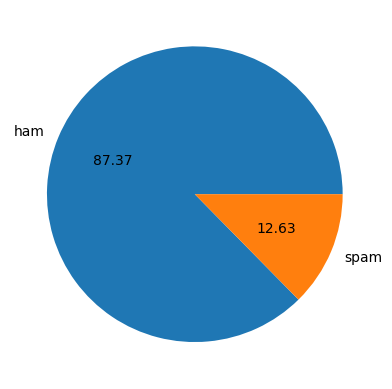

In [31]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(), labels=["ham","spam"], autopct="%0.2f")
plt.show()

In [33]:
import nltk
df["num_characters"] = df["text"].apply(len)


In [34]:
df.head()


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
#num of words
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [36]:
df.head()



,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [37]:
df["num_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
df.describe()


,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [39]:
df[df["target"]==0].describe()


,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [40]:
df[df["target"]==1].describe()


,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [41]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

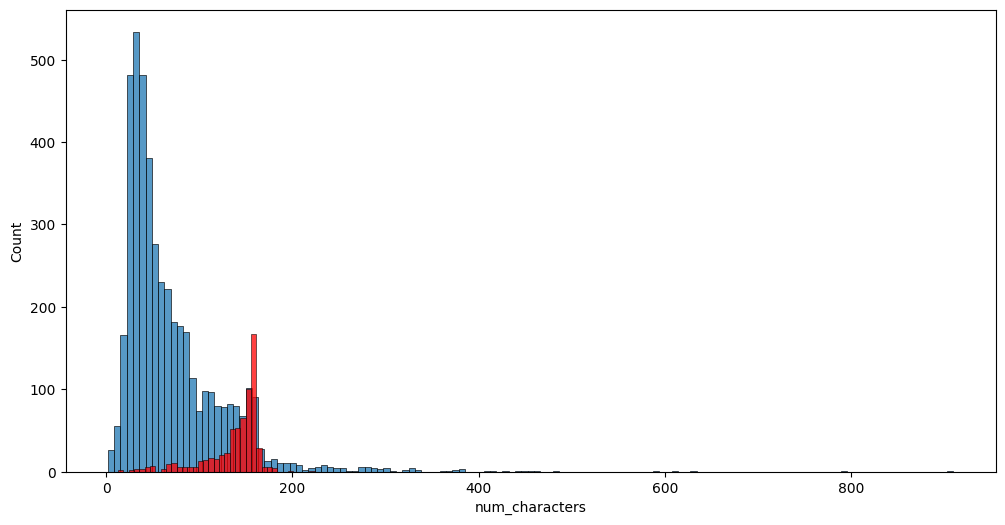

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"], color="red")

<Axes: xlabel='num_words', ylabel='Count'>

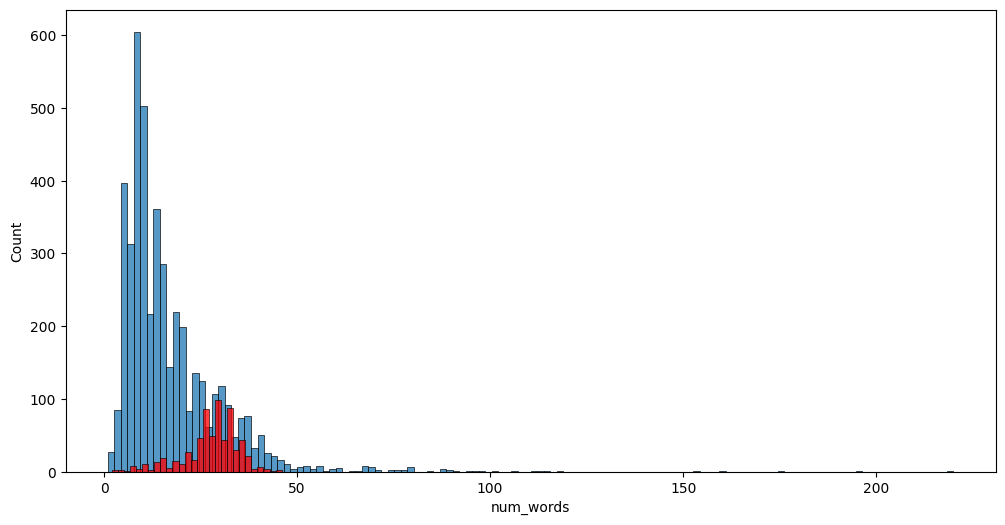

In [43]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"], color="red")

In [44]:
df.select_dtypes(include="number").corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

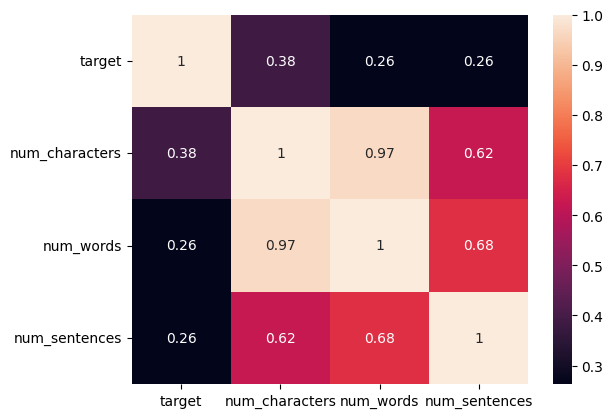

In [45]:
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True)


In [46]:
#3. Data Preprocessing
#Lower case, tokenization, removing special characters, removing stop words and punctuation, stemming
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [50]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [51]:
df["transformed_text"] = df["text"].apply(transform_text)


In [53]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

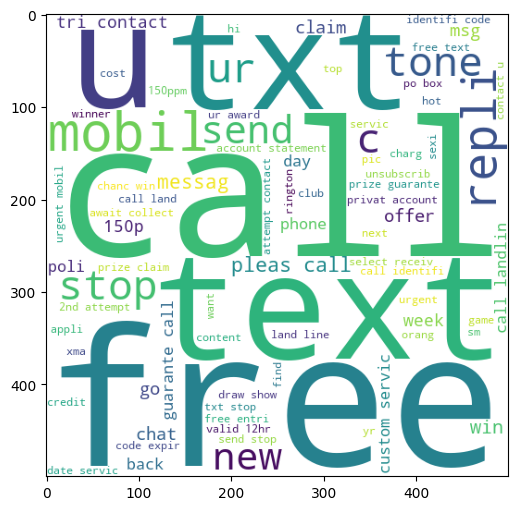

In [56]:
spam_wc = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


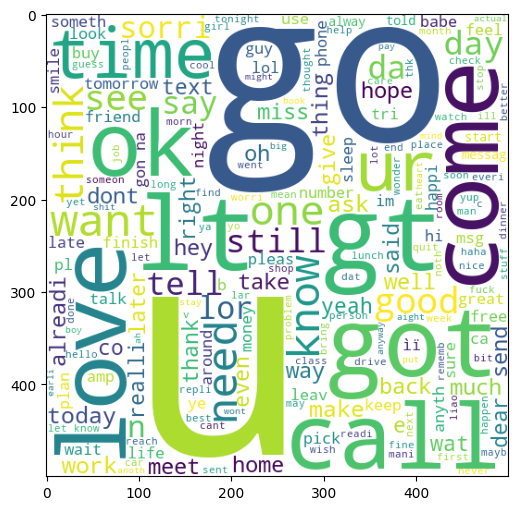

In [58]:
ham_wc = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)


In [59]:
spam_corpus = []
for msg in df[df["target"]==1]["transformed_text"].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [60]:
len(spam_corpus)


9939

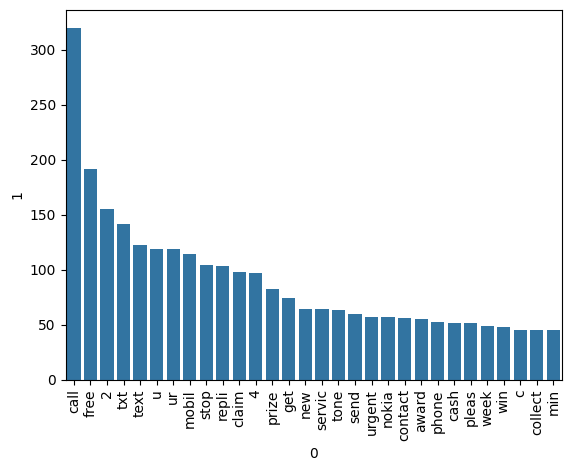

In [61]:
from collections import Counter
sns.barplot(x=0,y=1,data = pd.DataFrame(Counter(spam_corpus).most_common(30)))
plt.xticks(rotation="vertical")
plt.show()

In [62]:
ham_corpus=[]
for msg in df[df["target"]==0]["transformed_text"].tolist():
  for word in msg.split():
    ham_corpus.append(word)

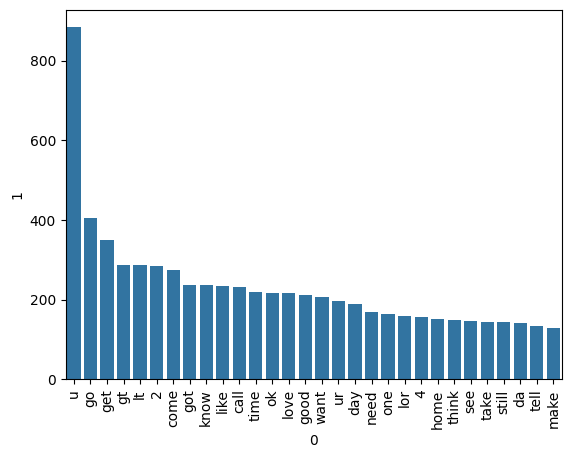

In [63]:
sns.barplot(x=0, y=1, data = pd.DataFrame(Counter(ham_corpus).most_common(30)))
plt.xticks(rotation="vertical")
plt.show()

In [64]:
#4. model building
#Count vectorizer implements bag of words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)
#using count vectorizer/ tf idf vectorizer
X = tfidf.fit_transform(df["transformed_text"]).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
# add the num_character column to X
#X = np.hstack((X, df["num_characters"].values.reshape(-1,1)))
#X.shape
y = df["target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [67]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [68]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [70]:
svc = SVC(kernel="sigmoid", gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver = "liblinear", penalty = "l1")
rfc = RandomForestClassifier(n_estimators = 50, random_state=2)
classifiers = {
    "SVC":svc,
    "NB":mnb,
    "DT":dtc,
    "LR":lrc,
    "RF":rfc
}
def train_classifier(classifier, X_train, y_train, X_test, y_test):
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  return accuracy, precision
accuracy_scores = []
precision_scores = []
for name, classifier in classifiers.items():
  current_accuracy, current_precision = train_classifier(classifier, X_train, y_train, X_test, y_test)
  print("For ", name)
  print("Accuracy = ", current_accuracy)
  print("Precision = ", current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy =  0.9758220502901354
Precision =  0.9747899159663865
For  NB
Accuracy =  0.9709864603481625
Precision =  1.0
For  DT
Accuracy =  0.9332688588007737
Precision =  0.8415841584158416
For  LR
Accuracy =  0.9555125725338491
Precision =  0.96
For  RF
Accuracy =  0.9738878143133463
Precision =  0.9826086956521739


In [71]:
performance_df = pd.DataFrame({"Algorithm":classifiers.keys(), "Accuracy":accuracy_scores, "Precision":precision_scores})
performance_df.sort_values("Precision", ascending=False)

,Algorithm,Accuracy,Precision
1,NB,0.970986,1.000000
4,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
3,LR,0.955513,0.960000
2,DT,0.933269,0.841584
